In [135]:
import torch
from torch import nn
import numpy as np

from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

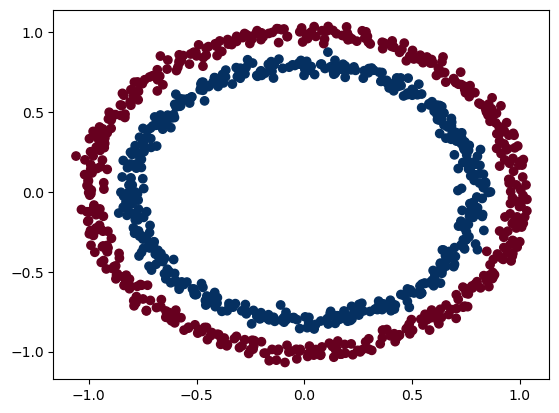

In [105]:
n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)

In [106]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

In [107]:
X = torch.from_numpy(X).type(torch.float32).to(device)
y = torch.from_numpy(y).type(torch.float32).to(device)


In [108]:
k = round(0.9*1000)
X_train, y_train = X[:k], y[:k]
X_test, y_test = X[k:], y[k:]

In [128]:
model = nn.Sequential(
    nn.Linear(2,4),
    nn.ReLU(),
    nn.Linear(4,8),
    nn.ReLU(),
    nn.Linear(8,1)
).to(device)

optim = torch.optim.SGD(model.parameters(), lr = 0.1)
loss_fn = nn.BCEWithLogitsLoss()

In [129]:
def accuracy_fn(y_pred, y_true):
    return 100 * torch.eq(y_pred, y_true).sum().item() / len(y_true)

In [130]:
EPOCHS = 10000
for i in tqdm(range(EPOCHS)):
    # Training

    model.train()

    y_logits = model(X_train).squeeze()
    y_pred_prob = torch.sigmoid(y_logits)
    y_pred = torch.round(y_pred_prob)

    loss = loss_fn(y_logits, y_train)
    accuracy = accuracy_fn(y_pred, y_train)

    optim.zero_grad()
    loss.backward()
    optim.step()


    if i % 1000 == 0:
        # Testing
        model.eval()

        with torch.inference_mode():

            test_logits = model(X_test).squeeze()
            test_pred_prob = torch.sigmoid(test_logits)
            test_pred = torch.round(test_pred_prob)

            test_loss = loss_fn(test_logits, y_test)
            test_accuracy = accuracy_fn(test_pred, y_test)

            print(f"Train Loss : {loss : .4f}, Train Accuracy = {accuracy: .4f} || Test Loss = {test_loss: .4f}, Test Accuracy = {test_accuracy: .4f}")

  0%|          | 0/10000 [00:00<?, ?it/s]

Train Loss :  0.6968, Train Accuracy =  49.3333 || Test Loss =  0.7009, Test Accuracy =  48.0000
Train Loss :  0.6897, Train Accuracy =  57.2222 || Test Loss =  0.6917, Test Accuracy =  52.0000
Train Loss :  0.6378, Train Accuracy =  68.7778 || Test Loss =  0.6414, Test Accuracy =  64.0000
Train Loss :  0.0588, Train Accuracy =  100.0000 || Test Loss =  0.0623, Test Accuracy =  100.0000
Train Loss :  0.0160, Train Accuracy =  100.0000 || Test Loss =  0.0206, Test Accuracy =  100.0000
Train Loss :  0.0084, Train Accuracy =  100.0000 || Test Loss =  0.0153, Test Accuracy =  100.0000
Train Loss :  0.0056, Train Accuracy =  100.0000 || Test Loss =  0.0121, Test Accuracy =  100.0000
Train Loss :  0.0041, Train Accuracy =  100.0000 || Test Loss =  0.0102, Test Accuracy =  100.0000
Train Loss :  0.0033, Train Accuracy =  100.0000 || Test Loss =  0.0091, Test Accuracy =  100.0000
Train Loss :  0.0027, Train Accuracy =  100.0000 || Test Loss =  0.0084, Test Accuracy =  100.0000


In [131]:
# Helper function

import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("scripts/helper_functions.py", "wb") as f:
    f.write(request.content)

from scripts.helper_functions import plot_predictions, plot_decision_boundary

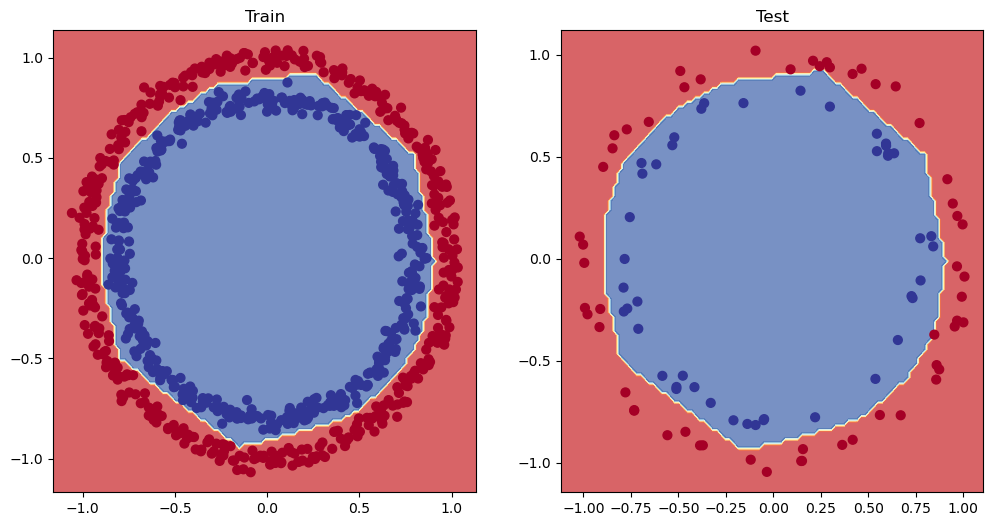

In [132]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

## Multi-class classification

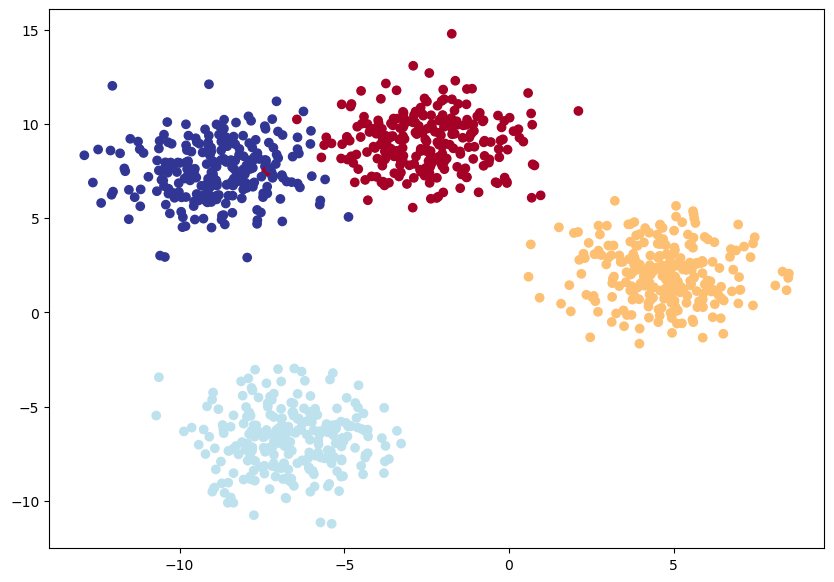

In [138]:
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float).to(device)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor).to(device)

# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [139]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [140]:
torch.unique(y_train)

tensor([0, 1, 2, 3])

In [167]:
model = nn.Sequential(
    nn.Linear(2,8),
    nn.ReLU(),
    nn.Linear(8,8),
    nn.ReLU(),
    nn.Linear(8,4)
).to(device)

loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr = 0.1)


In [168]:
model(X_train[:5]).shape

torch.Size([5, 4])

In [169]:
def accuracy_fn(y_logits, y_true):
    y_pred_prob = torch.softmax(y_logits, dim = 1)
    y_pred = torch.argmax(y_pred_prob, dim = 1).squeeze()

    acc = 100 * torch.eq(y_pred, y_true).sum().item() / len(y_true)
    return acc

In [170]:
EPOCHS = 100


for i in tqdm(range(EPOCHS)):

    # Training
    model.train()
    
    y_logits = model(X_train)
    train_acc = accuracy_fn(y_logits, y_train)
    
    loss = loss_fn(y_logits, y_train)
    
    optim.zero_grad()
    loss.backward()
    optim.step()


    # Testing

    if i % 10 == 0:

        model.eval()

        with torch.inference_mode():
            test_y_logits = model(X_test)
            test_acc = accuracy_fn(test_y_logits, y_test)

            test_loss = loss_fn(test_y_logits, y_test)

            print(f"Loss : { loss :.4f},  Accuracy : { train_acc:.4f} | Test Loss : {test_loss :.4f},  Accuracy : {test_acc:.4f}")


  0%|          | 0/100 [00:00<?, ?it/s]

Loss : 1.5457,  Accuracy : 24.6250 | Test Loss : 1.1982,  Accuracy : 51.0000
Loss : 0.5377,  Accuracy : 84.2500 | Test Loss : 0.4936,  Accuracy : 92.5000
Loss : 0.2281,  Accuracy : 99.3750 | Test Loss : 0.2118,  Accuracy : 99.5000
Loss : 0.1067,  Accuracy : 99.3750 | Test Loss : 0.0972,  Accuracy : 100.0000
Loss : 0.0690,  Accuracy : 99.3750 | Test Loss : 0.0606,  Accuracy : 99.5000
Loss : 0.0530,  Accuracy : 99.2500 | Test Loss : 0.0446,  Accuracy : 99.5000
Loss : 0.0445,  Accuracy : 99.2500 | Test Loss : 0.0361,  Accuracy : 99.5000
Loss : 0.0394,  Accuracy : 99.2500 | Test Loss : 0.0309,  Accuracy : 99.5000
Loss : 0.0361,  Accuracy : 99.2500 | Test Loss : 0.0273,  Accuracy : 99.5000
Loss : 0.0337,  Accuracy : 99.2500 | Test Loss : 0.0248,  Accuracy : 99.5000


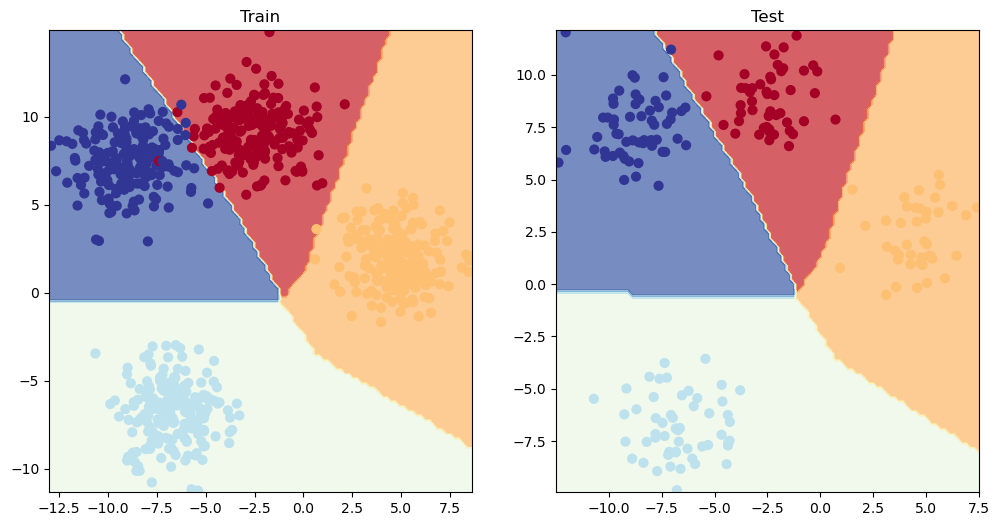

In [171]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [175]:
from torchmetrics import Accuracy

y_logits = model(X_train)
y_pred_prob = torch.softmax(y_logits, dim = 1)
y_pred = torch.argmax(y_pred_prob, dim = 1).squeeze()

torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

torchmetrics_accuracy(y_pred, y_train)

tensor(0.9925)